## STEP 1: GENERATE DATASET

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
%matplotlib inline

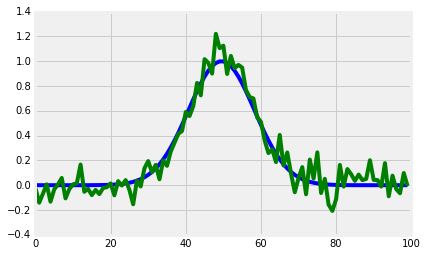

In [67]:
# create dataset
MU = 0
SIGMA = .1

t = np.linspace(-4, 4, 100)
y_clean = np.exp( -t**2 )
y_noisy = np.exp( -t**2 ) + np.random.normal(MU, SIGMA, t.shape)

plt.plot(y_clean, c = 'b')
plt.plot(y_noisy, c = 'g')

In [68]:
df = pd.DataFrame({'clean': y_clean, 'noisy': y_noisy})
df.head()

,clean,noisy
0,1.125352e-07,-0.023173
1,2.134069e-07,-0.141382
2,3.994447e-07,-0.067744
3,7.379605e-07,0.006843
4,1.345667e-06,-0.133190


## STEP 2: APPLY KALMAN FILTER

In [69]:
ALPHA = .65 # higher alphas result in cleaner signals, but introduces more lag

df['filtered'] = 0

for idx in range(1, df.shape[0]):
    df.ix[idx, 'filtered'] = (ALPHA * df.ix[(idx - 1), 'filtered']) + ((1 - ALPHA) * df.ix[idx, 'noisy'])
    
plt.plot(df['filtered'], c = 'y')
plt.plot(df['noisy'], c = 'g')
plt.plot(df['clean'], c = 'b')